# Segundo Trabalho de Inteligência Artificial

Rita Rezende Borges de Lima
<br>
2020065317

In [102]:
import heapq

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from collections import defaultdict, Counter
from typing import List
from utils import read_data, divide_features_and_label, euclidean_distance
from metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## K Nearest Neighbors

O algoritmo KNN recebe uma nova amostra não conhecida e de posse das suas características calcula a distância euclidiana para todas as amostras de treinamento. Em seguida obtém as k amostras com menor distância e retorna o rótulo mais comum entre essas.

### Escolha de Rótulo Baseada em Amostras mais Próximas

Inicialmente iremos definir a função ```weighted_most_frequent(pred, k)```, essa calcula quais são os rótulos de vizinho mais comuns entre os recebidos. Como estes estão em ordem de proximidade, é dado um peso decrescente a soma. Por exemplo se $k = 8$, o primeiro vizinho terá peso 1, o segundo 0.93, e o último 0.5.

In [103]:
def weighted_most_frequent(neighb_labels: List[str], k, labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']) -> str:
    """
    Returns the most frequent element in a list making a weighted mean, closest neighbors are more valuable. 
    Used to find the most frequent label in the k closest neighbors.
    """
    d = dict()
    for label in labels:
        d[label] = 0

    for idx, p in enumerate(neighb_labels):
        d[p] += (1 + (k - idx) * 1/k)/2
        

    return heapq.nlargest(1, d, key=d.get)[0]

### Função de Predição para Amostra Única

A função ```knn_predict_single(new_sample, x_train)``` itera por cada uma das amostras de treino, calculando a distância entre cada uma delas e a nova amostra que terá seu rótulo calculado e retornado. Cada uma dessas distâncias serão armazenadas em um heap. Por fim, vamos obter as k menores distâncias armazenadas no heap por meio da função própria  ```heapq.nsmallest(k, heap)``` e essa lista será passada para a função anterior para obtermos o rótulo da nova amostra.

In [104]:
def knn_predict_single(new_sample: pd.Series, x_train: pd.DataFrame, y_train: pd.DataFrame, k) -> str:
    """
    Returns the prediction for a single sample.
    """
    heap = []
    for idx, features in x_train.iterrows():
        distance = euclidean_distance(new_sample, features)
        heapq.heappush(heap, (distance, y_train[idx]))

    nearest_neighboors = heapq.nsmallest(k, heap)

    return weighted_most_frequent([neighbor[1] for neighbor in nearest_neighboors], k)

### Função de Predição para Múltiplas Amostras

A função ```knn_predict_multiple(new_sample, x_train, k)``` itera por cada uma das amostras de teste chamando a função descrita previamente e encontrando um rótulo para estas.

In [105]:
def knn_predict_multiple(x_train: pd.DataFrame, y_train: pd.DataFrame, x_test: pd.DataFrame, k) -> List[str]: 
    """
    Returns a list of predictions for the test set.
    """
    pred = []
    for idx, features in x_test.iterrows():
        pred.append(knn_predict_single(features, x_train, y_train, k))

    return pred

### Leitura e Tratamento de Dados

Vamos testar os dados do arquivo ```iris treino.csv``` no algoritmo implementado utilizando os dados em ```iris treino.csv``` como conjunto rotulado. Para isso inicialmente iremos ler estes dados e dividi-los em características e rótulos por meio das funções implementadas e armazenadas no arquivo ```utils.py```. 

In [134]:
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
train_data = read_data("../iris treino.csv")
test_data = read_data("../iris aleatório.csv")

x_test, y_test = divide_features_and_label(test_data) 
x_train, y_train = divide_features_and_label(train_data) 

### Teste e Cálculo de Métricas

Agora podemos chamar o algoritmo knn implementado para os dados lidos acima, obter uma predição e imprimir o resultado da predição do algoritmo com métricas como Acurácia, Precisão, Revocação e F1, além de plotar sua Matriz de Confusão. Todas essas funções foram implementadas e estão no arquivo ```metrics.py```

#### Matriz de Confusão:

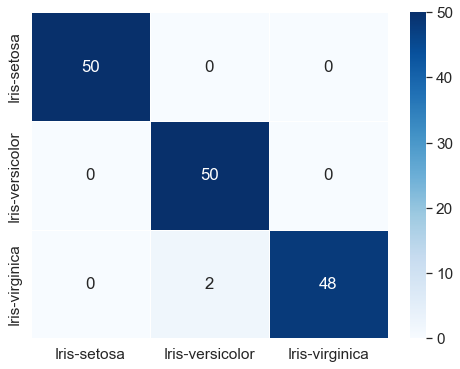

In [135]:
k = 2
pred_k2 = knn_predict_multiple(x_train, y_train, x_test, k)
cm = confusion_matrix(pred_k2, y_test)

_, axes = plt.subplots(figsize=(8,6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, xticklabels = labels, 
            yticklabels = labels, linewidths=.5, ax=axes, cmap="Blues")
plt.show()

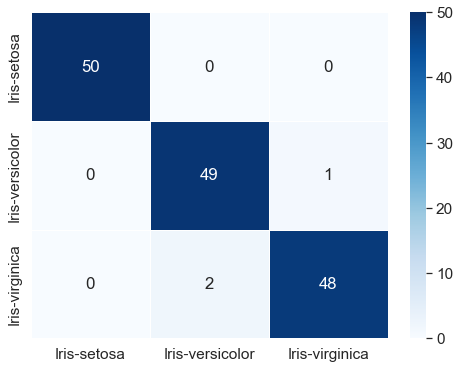

In [136]:
k = 8
pred_k8 = knn_predict_multiple(x_train, y_train, x_test, k)
cm = confusion_matrix(pred_k8, y_test)

_, axes = plt.subplots(figsize=(8,6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, xticklabels = labels, 
            yticklabels = labels, linewidths=.5, ax=axes, cmap="Blues")
plt.show()

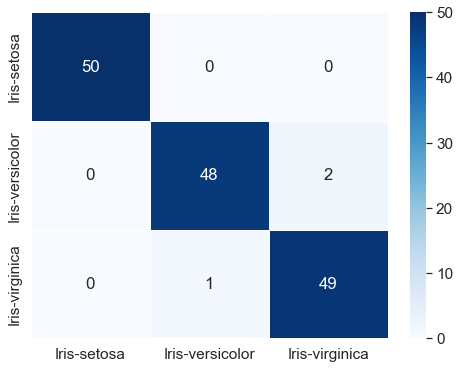

In [137]:
k = 32
pred_k32 = knn_predict_multiple(x_train, y_train, x_test, k)
cm = confusion_matrix(pred_k32, y_test)

_, axes = plt.subplots(figsize=(8,6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, xticklabels = labels, 
            yticklabels = labels, linewidths=.5, ax=axes, cmap="Blues")
plt.show()

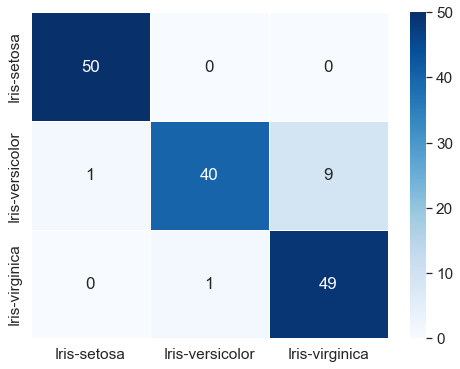

In [138]:
k = 128
pred_k128 = knn_predict_multiple(x_train, y_train, x_test, k)
cm = confusion_matrix(pred_k128, y_test)

_, axes = plt.subplots(figsize=(8,6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, xticklabels = labels, 
            yticklabels = labels, linewidths=.5, ax=axes, cmap="Blues")
plt.show()

#### Acurácia:

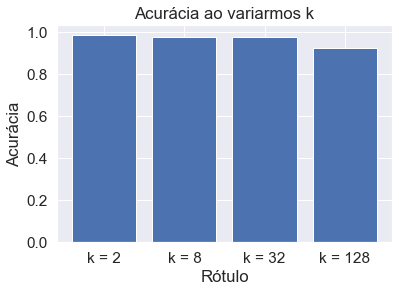

In [151]:
acc = [accuracy_score(pred_k2, y_test), accuracy_score(pred_k8, y_test), 
              accuracy_score(pred_k32, y_test), accuracy_score(pred_k128, y_test)]

plt.bar(['k = 2', 'k = 8', 'k = 32', 'k = 128'], acc)
plt.xlabel("Rótulo")
plt.ylabel('Acurácia')
plt.title("Acurácia ao variarmos k")
plt.xticks(rotation=0)

plt.show()

#### Precisão:

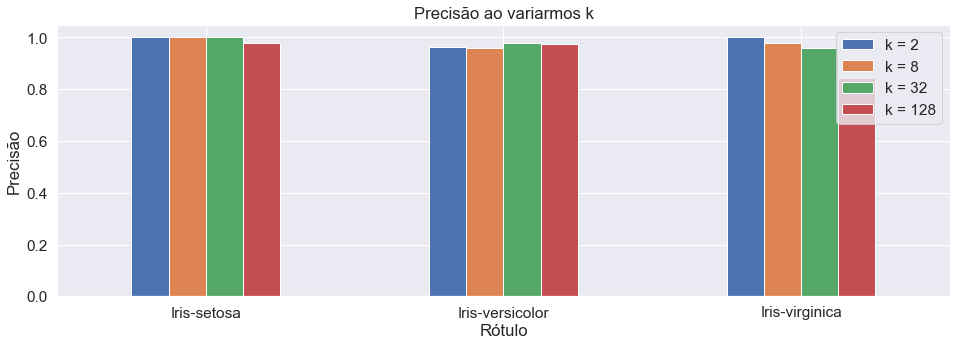

In [142]:
precisions = [precision_score(pred_k2, y_test), precision_score(pred_k8, y_test), 
              precision_score(pred_k32, y_test), precision_score(pred_k128, y_test)]
precisions_df = pd.concat(precisions, axis=1, join='inner')

precisions_df.plot(kind = 'bar', figsize=(16,5))
plt.xlabel("Rótulo")
plt.ylabel('Precisão')
plt.title("Precisão ao variarmos k")
plt.xticks(rotation=0)

plt.legend(('k = 2', 'k = 8', 'k = 32', 'k = 128') )
plt.show()

#### Revocação:

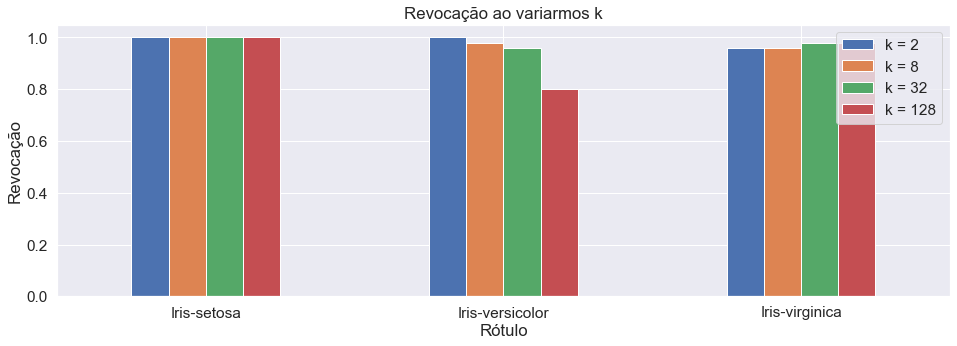

In [140]:
recalls = [recall_score(pred_k2, y_test), recall_score(pred_k8, y_test),
           recall_score(pred_k32, y_test), recall_score(pred_k128, y_test)]
recalls_df = pd.concat(recalls, axis=1, join='inner')

recalls_df.plot(kind = 'bar', figsize=(16,5))
plt.xlabel("Rótulo")
plt.ylabel('Revocação')
plt.title("Revocação ao variarmos k")
plt.xticks(rotation=0)

plt.legend(('k = 2', 'k = 8', 'k = 32', 'k = 128') )
plt.show()

#### F1:

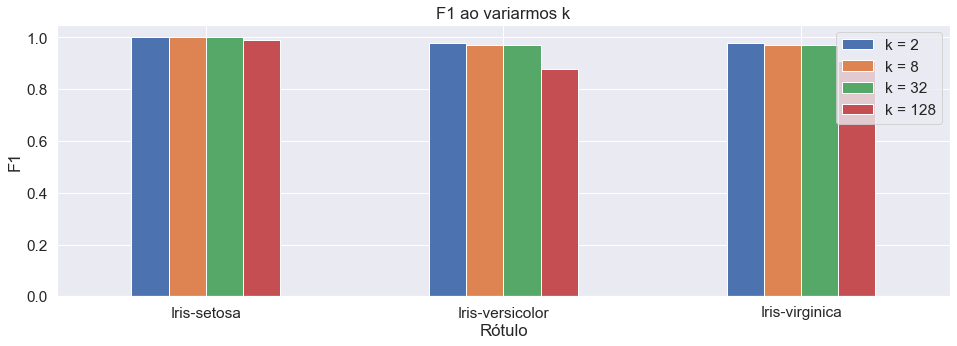

In [141]:
f1 = [f1_score(pred_k2, y_test), f1_score(pred_k8, y_test), 
      f1_score(pred_k32, y_test), f1_score(pred_k128, y_test)]
f1_df = pd.concat(f1, axis=1, join='inner')

f1_df.plot(kind = 'bar', figsize=(16,5))
plt.xlabel("Rótulo")
plt.ylabel('F1')
plt.title("F1 ao variarmos k")
plt.xticks(rotation=0)

plt.legend(('k = 2', 'k = 8', 'k = 32', 'k = 128') )
plt.show()

## K Means

O algoritmo KMeans tem como objetivo tentar dividir em uma quantidade $k$ de grupos, as $n$ amostras de treino. Para isso realiza os seguintes passos: 

1. Escolhe aleatoriamente $k$ pontos nas amostras de treino para serem os centróides de cada grupo.
2. Para todas as outras amostras, calcula qual centroide tem menor distância para essa e a adiciona no grupo deste centroide. 
3. Calcula novos centroides como a m ́edia das caracter ́ısticas das amostras de cada
grupo e recalcula qual amostra pertence a, qual grupo como anteriormente.
4. Caso a divis ̃ao em grupos tenha mudado repete 2 e 3, caso contr ́ario retorna os
centr ́oides e divis ̃oes